1) Loading data
CRITERION: 0.368282441007
NMI: 0.934208690727
ARI: 0.9616868964472085
ACCURACY:0.987149832948


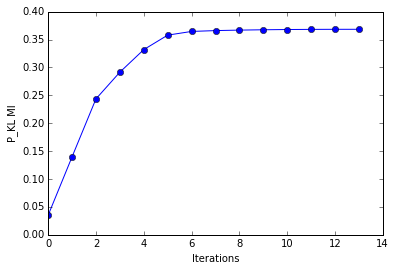

1012
1870

1388
1178

1491
1255

[[ 0.5505443   3.33570626  0.34428295]
 [ 0.45178825  0.2331706   1.83607562]
 [ 2.15948113  0.33601705  0.26586336]]


c:\Users\frole\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


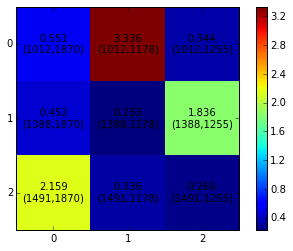

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, scipy.sparse as sp, scipy.io as io
from sklearn.metrics import confusion_matrix
from coclust.CoclustSpecMod import CoclustSpecMod
from coclust import CoclustInfo
from imp import reload
reload(CoclustInfo)
from coclust.utils import evaluation
reload(evaluation)
from coclust.CoclustInfo import CoclustInfo
from coclust.utils.evaluation import print_NMI_and_ARI, plot_convergence, print_accuracy, plot_confusion_matrix, plot_delta_kl
# Retrieve the Classic3  document-term matrix from a matlab file
print("1) Loading data")
file_name = "../datasets/classic3.mat"
matlab_dict = io.loadmat(file_name)
X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
model = CoclustInfo(n_row_clusters=3, n_col_clusters=3, n_init=4)
model.fit(X)

# Evaluate the results
print("CRITERION:",model.criterion)
true_row_labels=matlab_dict['labels'].flatten()
predicted_row_labels = model.row_labels_
print_NMI_and_ARI( true_row_labels, predicted_row_labels)
cm=confusion_matrix(true_row_labels,predicted_row_labels)
print_accuracy(cm,X.shape[0],3)
    
# Show convergence
plot_convergence(model.criterions, 'P_KL MI',marker='o')

# Show evaluation measures
#plot_evaluation_measures(true_row_labels, predicted_row_labels, cm,X.shape[0],3)

for i in range(3) :
    print(len(model.get_row_indices(i)))
    print(len(model.get_col_indices(i)))
    print()

plot_delta_kl(model.delta_kl_, model)
print(model.delta_kl_)

In [4]:
X.shape

(3891, 4303)

In [5]:
1384 + 1013 + 1494

3891

In [6]:
1247 + 1878 + 1178

4303